In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from arabic_reshaper import reshape
from bidi.algorithm import get_display


In [2]:
def reshape_text(text):
    reshaped_text = reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

In [3]:
q_df = pd.read_csv('Neek Language Learning App Questionnaire - Latest Version.csv')
q_df.head()

,Timestamp,Username,Subject ID\n(این سوال را فقط مسئول جمع آوری داده پاسخ دهد)\nsample: D[device number]-[last four digits of phone number],اگر این برنامه در دسترس شما باشد، روزانه حدوداً چند دقیقه را به آن اختصاص می‌دهید؟,اگر این برنامه در دسترس شما باشد در طول یک هفته چند بار برای مرور یا مطالعه مباحث جدید به این برنامه رجوع میکنید؟,فکر میکنید اشتراک نامحدود نیک هم قیمت کدام یک از این گزینه ها باشد؟,استفاده از این برنامه چگونه بود؟,قسمت پادکست در برنامه را چطور ارزیابی می‌کنید؟,آزمون انتهای هر بخش را چگونه ارزیابی می کنید؟,رنگ های به کار رفته در برنامه را چطور ارزیابی میکنید؟,فضای گرافیکی و ظاهر برنامه (شکل و اندازه علامت ها و ... ) را چطور ارزیابی میکنید؟,کدام بخش برنامه برای شما جذابیت بیشتری داشت؟,کدام بخش برنامه را دوست نداشتید؟,شما متعلق به کدام گروه سنی هستید؟,جنسیت شما چیست؟,کجا زندگی می کنید؟,چقدر احتمال دارد اپلیکیشن نیک را به دیگران معرفی کنید؟,آیا از اطرافیان خود کسی را میشناسید که به این برنامه نیاز داشته باشد؟,آیا می خواهید چیز بیشتری در مورد تجربه امروز خود در استفاده از این برنامه به اشتراک بگذارید؟\nما نظرات شما را با دقت می خوانیم.
0,2024/02/15 8:55:32 PM GMT+3:30,behpas.tehran@gmail.com,D01-5302,۰ تا ۱۵ دقیقه,۰ تا ۲ بار در هفته,D,کمی گیج کننده بود.,پادکست را امتحان کردم و خوشم نیامد.,انگیزه ی من را برای ادامه کار با برنامه کم کرد.,نظری ندارم.,به نظرم باید بیشتر مورد بررسی قرار گیرد.,آزمون,پادکست,۴۰ - ۵۰,زن,شهر تهران,به هیچ وجه معرفی نمیکنم.,بله,NaN
1,2024/02/18 11:12:21 AM GMT+3:30,behpas.tehran@gmail.com,D02-8226,۰ تا ۱۵ دقیقه,۰ تا ۲ بار در هفته,F,بعد از کمی تلاش راه افتادم.,پادکست را امتحان کردم و برایم جالب بود.,تاثیری درانگیزه ام نداشت.,رنگ ها خوب انتخاب شده اند.,نظری ندارم.,شنیداری,دستور زبان (گرامر),۳۰ - ۴۰,مرد,شهر تهران,نظری ندارم.,بله,NaN
2,2024/02/18 12:34:18 PM GMT+3:30,behpas.tehran@gmail.com,D01-3772,۱۵ تا ۳۰ دقیقه,۰ تا ۲ بار در هفته,C,فرقی با برنامه هایی که استفاده میکنم نداشت.,پادکست را گوش ندادم چون وقت کافی نبود.,تاثیری درانگیزه ام نداشت.,به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار ...,به نظرم باید بیشتر مورد بررسی قرار گیرد.,دستور زبان (گرامر),ویدئوهای آموزشی,۳۰ - ۴۰,مرد,شهر تهران,شاید معرفی کنم.,بله,Barname khobi bod . Ye meghdar moshkel hang ka...
3,2024/02/18 1:52:17 PM GMT+3:30,behpas.tehran@gmail.com,D02-7786,۰ تا ۱۵ دقیقه,۰ تا ۲ بار در هفته,F,کمی گیج کننده بود.,پادکست را امتحان کردم و خوشم نیامد.,انگیزه ی من را برای ادامه کار با برنامه کم کرد.,رنگ ها بسیار بد انتخاب شده اند.,بسیار بد طراحی شده بود.,یاد گرفتن لغات,دستور زبان (گرامر),۳۰ - ۴۰,مرد,شهر تهران,به هیچ وجه معرفی نمیکنم.,بله,Eftezah blood!
4,2024/02/21 10:17:31 AM GMT+3:30,behpas.tehran@gmail.com,D01-6310,۱۵ تا ۳۰ دقیقه,۰ تا ۲ بار در هفته,H,خیلی راحت بود.,پادکست را امتحان کردم و برایم جالب بود.,عالی بود و من را برای ادامه دادن ترغیب کرد.,رنگ ها بسیار بد انتخاب شده اند.,به نظرم باید بیشتر مورد بررسی قرار گیرد.,ویدئوهای آموزشی,دستور زبان (گرامر);خواندن,۴۰ - ۵۰,زن,شهر تهران,شاید معرفی کنم.,بله,NaN


In [4]:
new_column_names = ['Timestamp', 'Username', 'wearer_name', 'daily_engagement_minute', 'daily_engagement_pickup',
                    'subscription_price', 'how_easy', 'podcast', 'test', 'colours', 'graphics',
                    'favourite_part', 'least_favourite_part', 'age', 'gender', 'city', 'recommend',
                    'do you know anyone who would need this app?', 'comments']
q_df.columns = new_column_names
q_df = q_df.drop(columns=['Timestamp', 'Username'])

In [5]:
et_df = pd.read_csv('24.csv')

In [6]:
df = pd.merge(et_df, q_df[['wearer_name', 'age', 'gender']], 
              on='wearer_name', how='left')
df.head()

,wearer_name,install_duration,listening_duration,vocab_duration,reading_duration,grammar_duration,video_duration,podcast_duration,test_duration,quiz_duration,total_duration,notification_count,distraction_count,question_count,age,gender
0,D01-5302,0.797181,5.463025,2.613458,4.072689,1.816333,1.946836,6.996892,2.964282,0.0,38.254417,0,2,5,۴۰ - ۵۰,زن
1,D02-8226,8.629088,4.876409,5.154531,4.800703,1.809550,1.009921,4.466785,3.759492,0.0,41.679000,2,2,0,۳۰ - ۴۰,مرد
2,D01-3772,1.757814,0.827994,0.000000,10.592752,4.329150,3.336998,0.000000,9.567636,0.0,34.034300,0,3,0,۳۰ - ۴۰,مرد
3,D02-7786,4.019021,1.315086,2.886946,0.760807,1.614360,1.793264,1.294990,2.126103,0.0,25.197800,1,1,0,۳۰ - ۴۰,مرد
4,D02-9545,2.511471,2.411044,5.340202,5.011242,2.231007,1.835234,0.000000,5.074624,0.0,27.500150,2,0,0,۵۰ - ۶۰,مرد


In [7]:
print(q_df.columns)

Index(['wearer_name', 'daily_engagement_minute', 'daily_engagement_pickup',
       'subscription_price', 'how_easy', 'podcast', 'test', 'colours',
       'graphics', 'favourite_part', 'least_favourite_part', 'age', 'gender',
       'city', 'recommend', 'do you know anyone who would need this app?',
       'comments'],
      dtype='object')


In [8]:
# print("Unique Ages:", df['age'].unique())
# print("Unique Genders:", df['gender'].unique())
# print("Unique Colours:", df['colours'].unique())
# print("Unique Graphics:", df['graphics'].unique())
# print(df['podcast'].unique())


In [9]:
age_mapping = {
    '۴۰ - ۵۰': '40-50',
    '۳۰ - ۴۰': '30-40',
    '۵۰ - ۶۰': '50-60'
}
df['age'] = df['age'].map(age_mapping)

In [10]:
mapping = {
    'زن': 'F',
    'مرد': 'M'
}
df['gender'] = df['gender'].map(mapping)

In [11]:
# mapping = {
# 'رنگ ها بسیار بد انتخاب شده اند.': 1,
# 'به نظرم انتخاب رنگ باید بیشتر مورد بررسی قرار گیرد.': 2,
# 'نظری ندارم.': 3,
# 'رنگ ها خوب انتخاب شده اند.': 4
# }
# df['colours'] = df['colours'].map(mapping)



In [12]:
# mapping = {
# 'بسیار بد طراحی شده بود.': 1,
# 'به نظرم باید بیشتر مورد بررسی قرار گیرد.': 2,
# 'نظری ندارم.': 3,
# 'خوب و مناسب بود.': 4
# }
# df['graphics'] = df['graphics'].map(mapping)



In [13]:
# mapping = {
# 'به هیچ وجه معرفی نمیکنم.': 1,
# 'احتمالا معرفی نمیکنم.': 2,
# 'نظری ندارم.': 3,
# 'شاید معرفی کنم.': 4,
# 'حتما معرفی میکنم.': 5
# }
# df['recommend'] = df['recommend'].map(mapping)


In [14]:
# mapping = {
# 'به هیچ وجه معرفی نمیکنم.': 1,
# 'احتمالا معرفی نمیکنم.': 2,
# 'نظری ندارم.': 3,
# 'شاید معرفی کنم.': 4,
# 'حتما معرفی میکنم.': 5
# }

# ['به نظرم باید بیشتر مورد بررسی قرار گیرد.' 'نظری ندارم.'
#  'بسیار بد طراحی شده بود.' 'خوب و مناسب بود.' nan]
# ['پادکست را امتحان کردم و خوشم نیامد.'
#  'پادکست را امتحان کردم و برایم جالب بود.'
#  'پادکست را گوش ندادم چون وقت کافی نبود.'
#  'نتوانستم از قسمت پادکست استفاده کنم.' 'قسمت پادکست اصلا به چشمم نخورد.'
# df['podcast'] = df['podcast'].map(mapping)


In [15]:
# df.to_csv('merged.csv', index=False)

In [16]:
# new_column_names = ['Participant ID', 'DurationOfEgagement', 'Zero2One Time',
#        'Listening', 'Vocab', 'Reading',
#        'Video', 'Podcast', 'Test', 'Quiz',
#        'Ask for Help?', 'Distractions', 'Notifications', 'Grammar',
#        'MaxLesson', 'Selected Item', 'favourite_part', 'least_favourite_part', 'Age', 'Gender', 'Assessment_Colors',
#        'Assessment_Graphics', 'Assessment_Podcast', 'Recommendation']
# df.columns = new_column_names


In [17]:
print(df.columns)

Index(['wearer_name', 'install_duration', 'listening_duration',
       'vocab_duration', 'reading_duration', 'grammar_duration',
       'video_duration', 'podcast_duration', 'test_duration', 'quiz_duration',
       'total_duration', 'notification_count', 'distraction_count',
       'question_count', 'age', 'gender'],
      dtype='object')


In [18]:
df

,wearer_name,install_duration,listening_duration,vocab_duration,reading_duration,grammar_duration,video_duration,podcast_duration,test_duration,quiz_duration,total_duration,notification_count,distraction_count,question_count,age,gender
0,D01-5302,0.797181,5.463025,2.613458,4.072689,1.816333,1.946836,6.996892,2.964282,0.000000,38.254417,0,2,5,40-50,F
1,D02-8226,8.629088,4.876409,5.154531,4.800703,1.809550,1.009921,4.466785,3.759492,0.000000,41.679000,2,2,0,30-40,M
2,D01-3772,1.757814,0.827994,0.000000,10.592752,4.329150,3.336998,0.000000,9.567636,0.000000,34.034300,0,3,0,30-40,M
3,D02-7786,4.019021,1.315086,2.886946,0.760807,1.614360,1.793264,1.294990,2.126103,0.000000,25.197800,1,1,0,30-40,M
4,D02-9545,2.511471,2.411044,5.340202,5.011242,2.231007,1.835234,0.000000,5.074624,0.000000,27.500150,2,0,0,50-60,M
5,D01-6310,4.848515,0.932938,0.547170,0.456139,1.509992,0.401590,1.340888,3.085695,0.000000,24.050883,0,3,1,40-50,F
6,D02-4030,3.196718,4.067158,2.250797,6.668980,4.810251,1.972432,0.000000,3.214278,0.000000,33.142900,0,0,11,50-60,M
7,D01-5340,4.194227,3.854340,4.632185,1.086874,3.717605,0.000000,0.000000,5.337669,0.000000,33.072467,5,2,5,40-50,M
8,D02-3569,7.652874,0.000000,3.467003,0.000000,0.000000,0.000000,0.000000,15.994058,3.858636,35.900583,2,0,0,40-50,M
9,D02-9344,2.479708,3.469734,2.554343,7.031555,2.834822,1.308938,0.000000,4.554687,0.000000,44.562950,3,1,0,30-40,F


In [19]:
# filtered_df = df[df['Podcast'] != 0]
# filtered_df['Assessment_Podcast'] = filtered_df['Assessment_Podcast'].apply(reshape_text)
# podcast_count = filtered_df['Assessment_Podcast'].value_counts()

# plt.figure(figsize=(8, 6))
# plt.pie(podcast_count, labels=podcast_count.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20})
# plt.show()

In [20]:
# color_categories = sorted(filtered_df['Assessment_Colors'].unique())
# graphics_categories = sorted(filtered_df['Assessment_Graphics'].unique())

# color_map = plt.get_cmap('tab20')
# colors_for_colors = {category: color_map.colors[i] for i, category in enumerate(color_categories)}
# colors_for_graphics = {category: color_map.colors[i] for i, category in enumerate(graphics_categories)}

# colors_count = filtered_df['Assessment_Colors'].value_counts().sort_index()
# graphics_count = filtered_df['Assessment_Graphics'].value_counts().sort_index()


In [21]:
# def plot_pie_chart(counts, color_mapping, title):
#     plt.figure(figsize=(8, 6))
#     plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140,
#             textprops={'fontsize': 20}, colors=[color_mapping[label] for label in counts.index])
#     plt.title(title, fontsize=20)
#     plt.show()

# plot_pie_chart(colors_count, colors_for_colors, 'Assessment Colors')
# plot_pie_chart(graphics_count, colors_for_graphics, 'Assessment Graphics')


In [22]:
# filtered_df['favourite_part'] = filtered_df['favourite_part'].apply(lambda x: x.split(';'))

# all_parts = [item for sublist in filtered_df['favourite_part'].tolist() for item in sublist]
# favourite_part_count = pd.Series(all_parts).value_counts()

# explode_values = [0.1] * len(favourite_part_count)  # Explode all slices uniformly

# colors = plt.get_cmap('tab20').colors

# plt.figure(figsize=(8, 6))
# plt.pie(favourite_part_count, labels=favourite_part_count.index, autopct='%1.1f%%', startangle=140,
#         textprops={'fontsize': 20}, explode=explode_values, colors=colors[:len(favourite_part_count)])
# plt.title('Favorite Part', fontsize=20)
# plt.show()


In [23]:
# filtered_df['least_favourite_part'] = filtered_df['least_favourite_part'].apply(reshape_text)
# filtered_df['least_favourite_part'] = filtered_df['least_favourite_part'].apply(lambda x: x.split(';'))

# all_parts = [item for sublist in filtered_df['least_favourite_part'].tolist() for item in sublist]
# favourite_part_count = pd.Series(all_parts).value_counts()

# explode_values = [0.1] * len(favourite_part_count)  # Explode all slices uniformly

# colors = plt.get_cmap('tab20').colors

# plt.figure(figsize=(8, 6))
# plt.pie(favourite_part_count, labels=favourite_part_count.index, autopct='%1.1f%%', startangle=140,
#         textprops={'fontsize': 20}, explode=explode_values, colors=colors[:len(favourite_part_count)])
# plt.title('Least Favorite Part', fontsize=20)
# plt.show()


In [24]:
df

,wearer_name,install_duration,listening_duration,vocab_duration,reading_duration,grammar_duration,video_duration,podcast_duration,test_duration,quiz_duration,total_duration,notification_count,distraction_count,question_count,age,gender
0,D01-5302,0.797181,5.463025,2.613458,4.072689,1.816333,1.946836,6.996892,2.964282,0.000000,38.254417,0,2,5,40-50,F
1,D02-8226,8.629088,4.876409,5.154531,4.800703,1.809550,1.009921,4.466785,3.759492,0.000000,41.679000,2,2,0,30-40,M
2,D01-3772,1.757814,0.827994,0.000000,10.592752,4.329150,3.336998,0.000000,9.567636,0.000000,34.034300,0,3,0,30-40,M
3,D02-7786,4.019021,1.315086,2.886946,0.760807,1.614360,1.793264,1.294990,2.126103,0.000000,25.197800,1,1,0,30-40,M
4,D02-9545,2.511471,2.411044,5.340202,5.011242,2.231007,1.835234,0.000000,5.074624,0.000000,27.500150,2,0,0,50-60,M
5,D01-6310,4.848515,0.932938,0.547170,0.456139,1.509992,0.401590,1.340888,3.085695,0.000000,24.050883,0,3,1,40-50,F
6,D02-4030,3.196718,4.067158,2.250797,6.668980,4.810251,1.972432,0.000000,3.214278,0.000000,33.142900,0,0,11,50-60,M
7,D01-5340,4.194227,3.854340,4.632185,1.086874,3.717605,0.000000,0.000000,5.337669,0.000000,33.072467,5,2,5,40-50,M
8,D02-3569,7.652874,0.000000,3.467003,0.000000,0.000000,0.000000,0.000000,15.994058,3.858636,35.900583,2,0,0,40-50,M
9,D02-9344,2.479708,3.469734,2.554343,7.031555,2.834822,1.308938,0.000000,4.554687,0.000000,44.562950,3,1,0,30-40,F


In [25]:
zero_notif = df[df['notification_count'] > 10]
print(len(zero_notif))

1


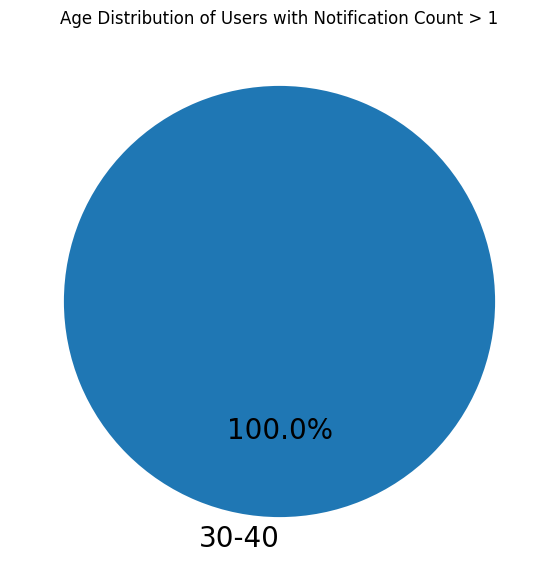

In [26]:
age_counts = zero_notif['age'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})
plt.title('Age Distribution of Users with Notification Count > 1')
plt.show()


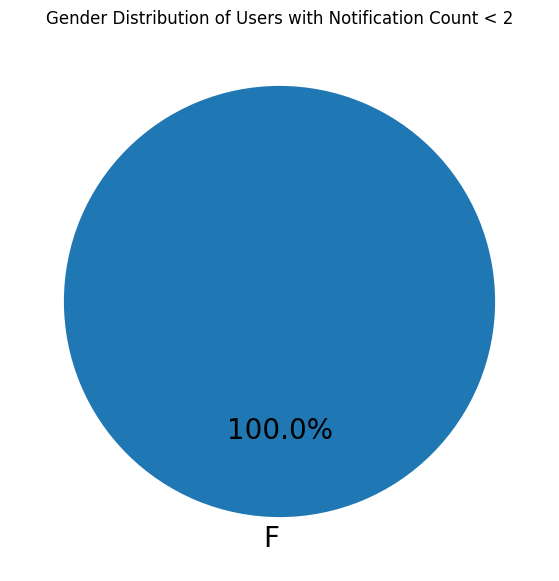

In [27]:
age_counts = zero_notif['gender'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})
plt.title('Gender Distribution of Users with Notification Count < 2')
plt.show()

In [29]:
df.to_csv('eyetracking_data.csv')